In [1]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from contrastive_model import SemanticSimilarityModel
from zero_shot_datasets import GTZANDataset
from transformers import  BertTokenizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import glob
import os
import IPython

/home/theodore/Desktop/regularized music encoder/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [10]:
training_loss_hist = []
validation_loss_hist = []

for i in range(10, 110, 10):
    print(i)
    saved_model = torch.load(f'contrasitive_training_checkpoints/checkpoint_epoch_{i}.pth')
    state_dict = saved_model['model_state_dict']
    training_loss = saved_model['train_loss']
    validation_loss = saved_model['valid_loss']

    training_loss_hist.append([i, training_loss])
    validation_loss_hist.append([i, validation_loss])

10
20
30
40
50
60
70
80
90
100


In [11]:
print(training_loss_hist)
print(validation_loss_hist)

[[10, 3.31799786731175], [20, 3.143900783538818], [30, 3.032544183458601], [40, 2.9508857672555107], [50, 2.871644301823207], [60, 2.824103791373117], [70, 2.791425840650286], [80, 2.762237495149885], [90, 2.7343688075201853], [100, 2.714418895993914]]
[[10, 3.212559282575335], [20, 3.0921681175231934], [30, 3.0536392582484653], [40, 3.030393083027431], [50, 3.010328730174473], [60, 2.979351490565709], [70, 2.99601518031529], [80, 3.046846809387207], [90, 3.0514091025761196], [100, 3.023589782169887]]


Plot has been saved as 'loss_plot.png'


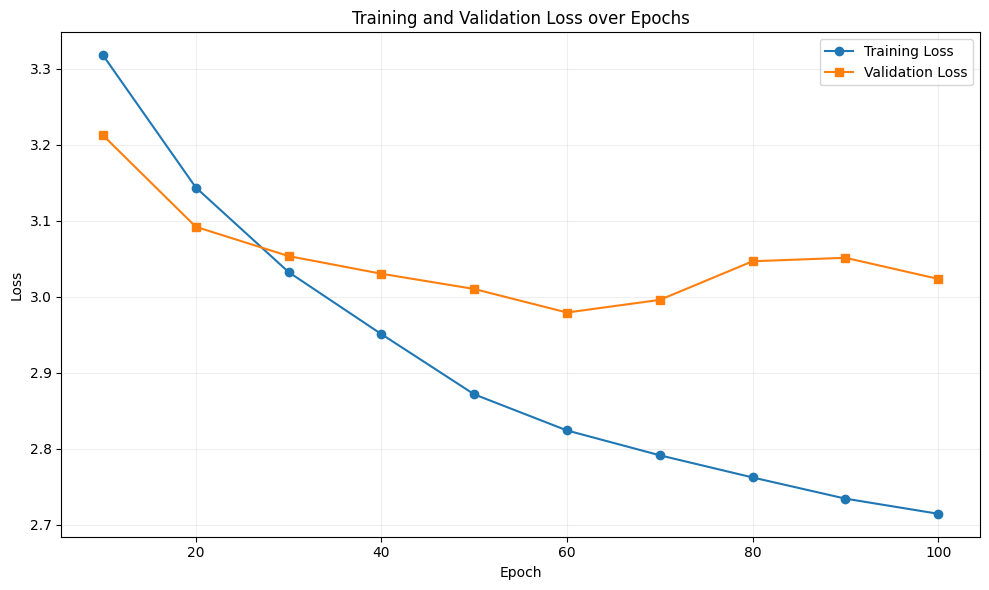

In [15]:
train_epochs, train_losses = zip(*training_loss_hist)
val_epochs, val_losses = zip(*validation_loss_hist)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(train_epochs, train_losses, label='Training Loss', marker='o')
plt.plot(val_epochs, val_losses, label='Validation Loss', marker='s')

# Customize the plot
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)

# Show the plot
plt.tight_layout()

plt.savefig('loss_plot.png', dpi=300, bbox_inches='tight')
print("Plot has been saved as 'loss_plot.png'")